In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import svm model
from sklearn import svm
# Import classification report for making the classification report
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/content/drive/My Drive/heart.csv")

In [5]:
data.shape

(1025, 14)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
382,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
364,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
131,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [14]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
data.isnull().sum().sum()

0

So, we have no missing values

**Exploratory Data Analysis (EDA)**

In [16]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

**Correlation Analysis**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)



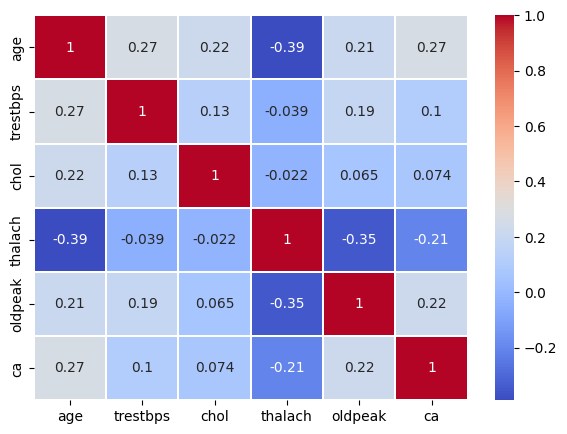

In [35]:
# store numeric variables in cnames, using the actual column names from the DataFrame
cnames = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

# Correlation plot
df_corr = data.loc[:, cnames]  # Use the corrected cnames list
# Generate correlation matrix
corr = df_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.1)
plt.show()

In [36]:
df_corr = data.loc[:,cnames]
df_corr

,age,trestbps,chol,thalach,oldpeak,ca
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

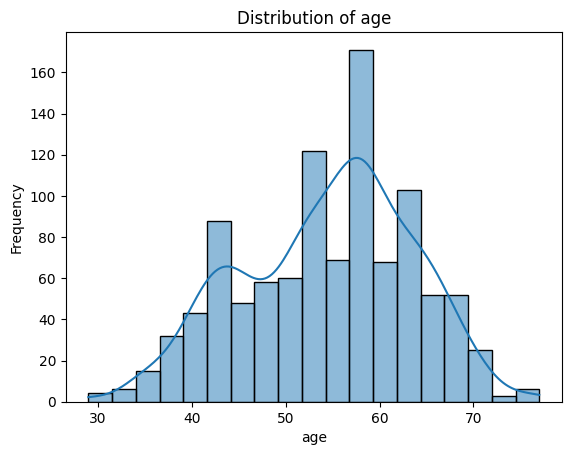

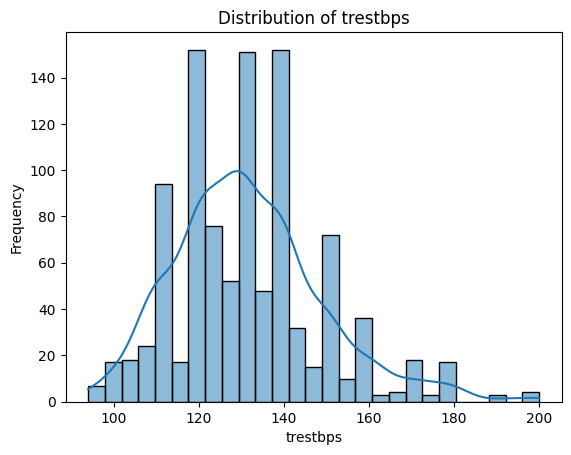

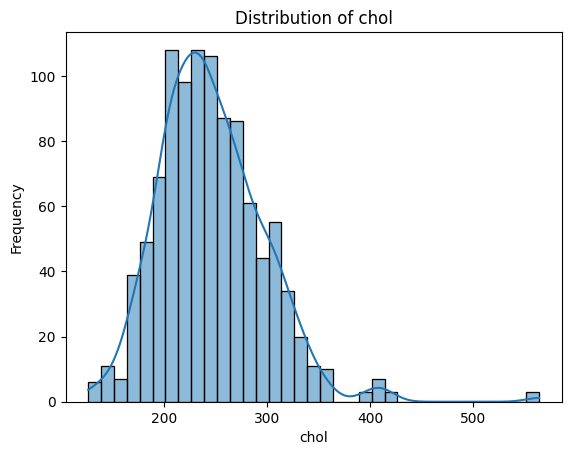

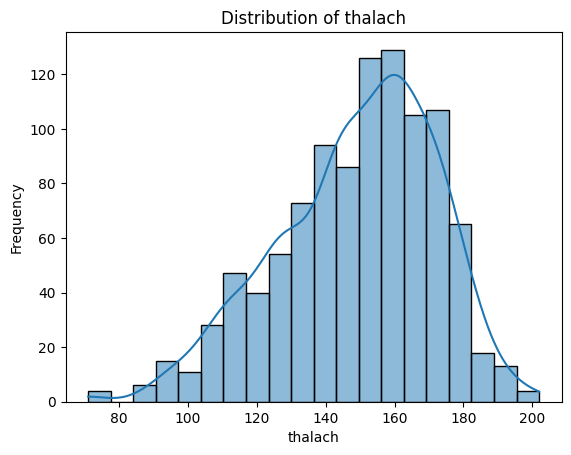

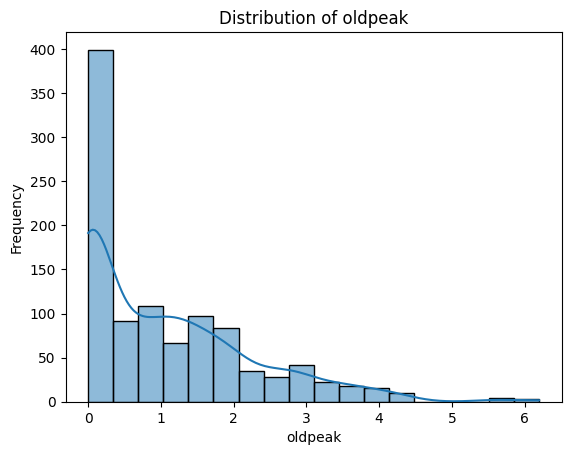

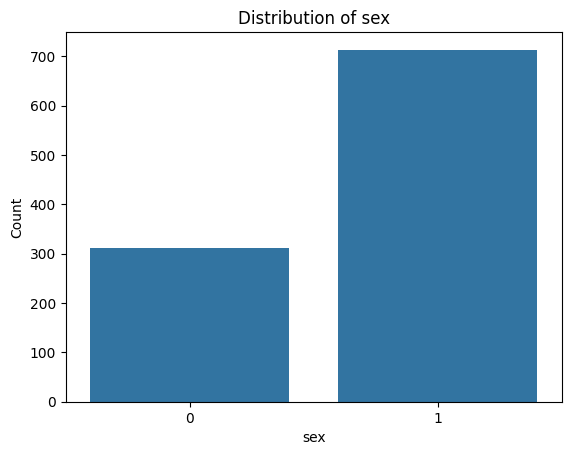

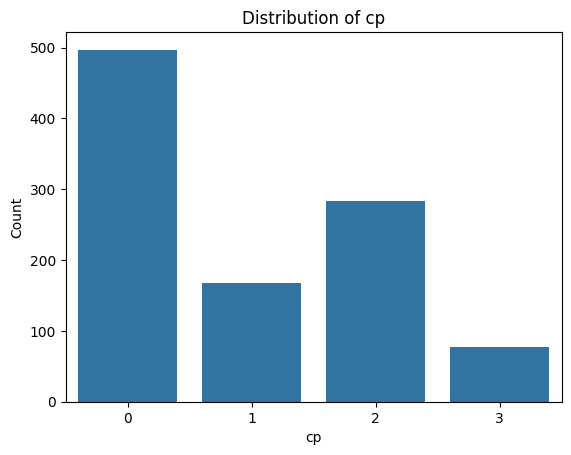

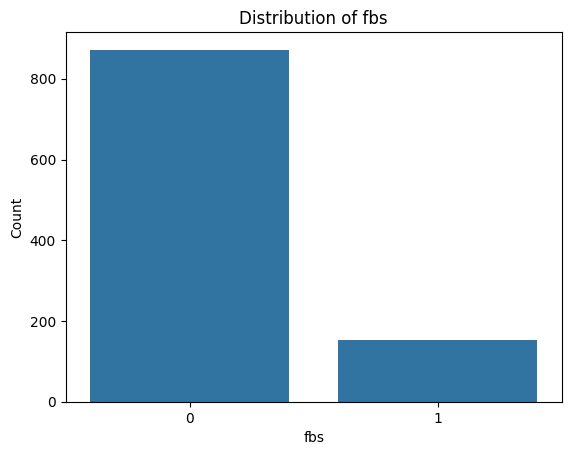

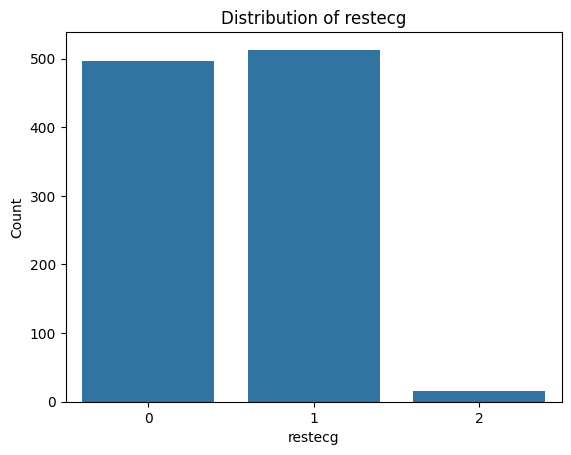

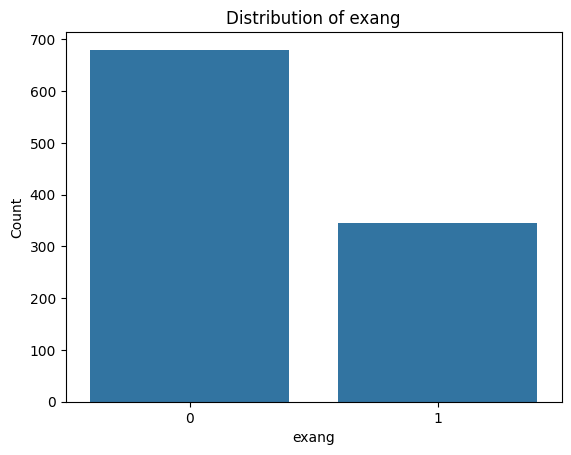

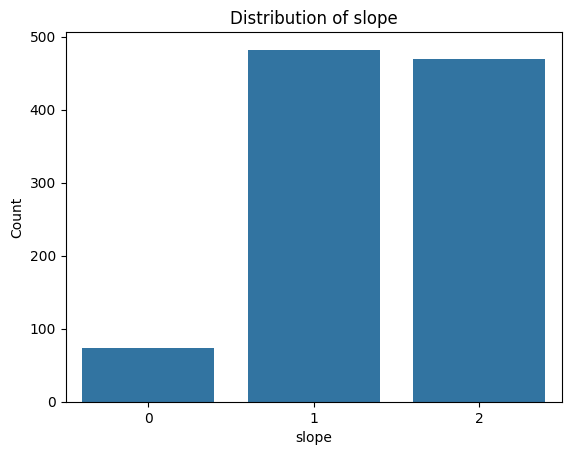

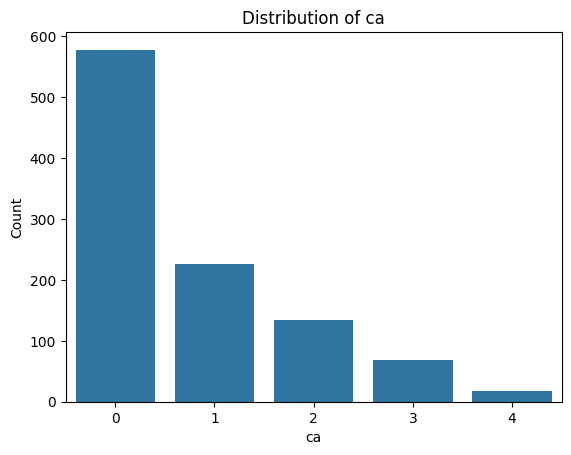

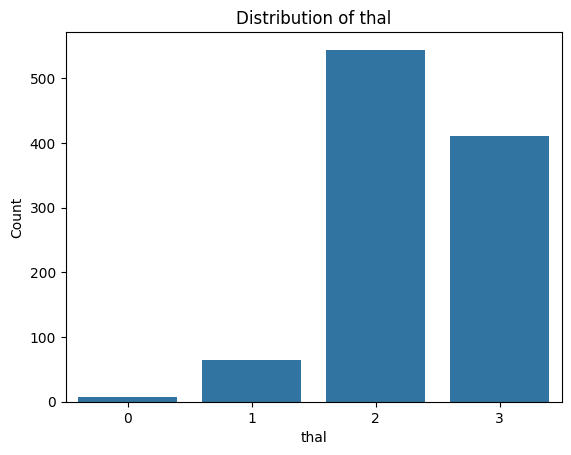

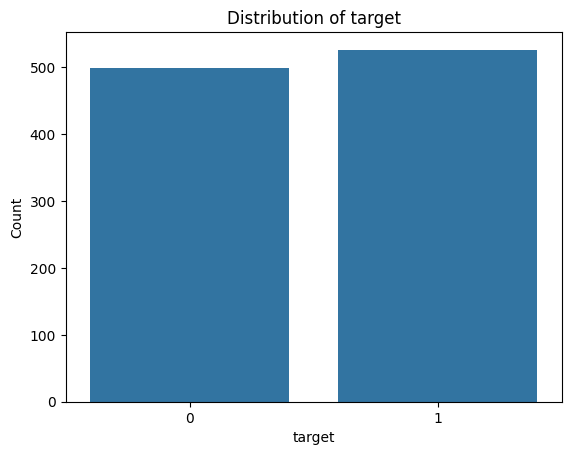

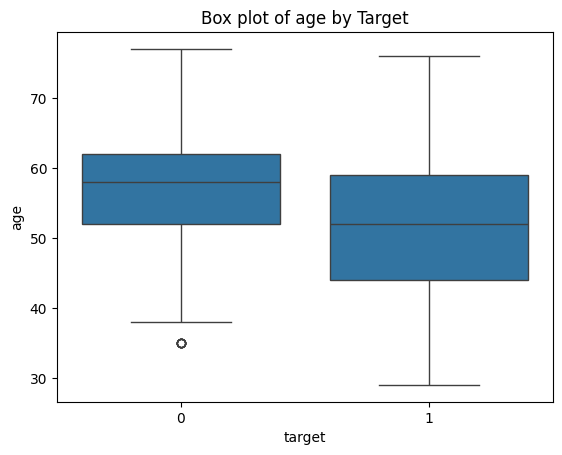

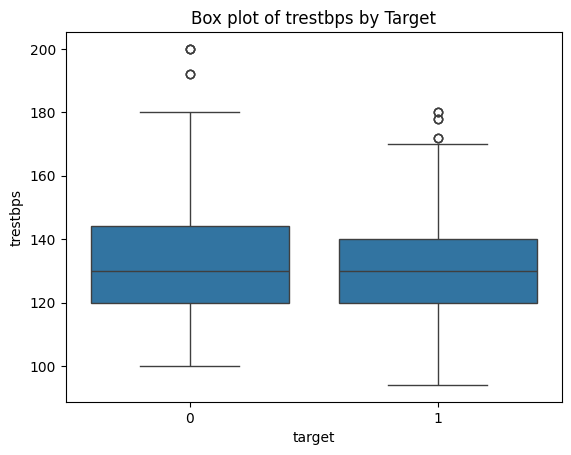

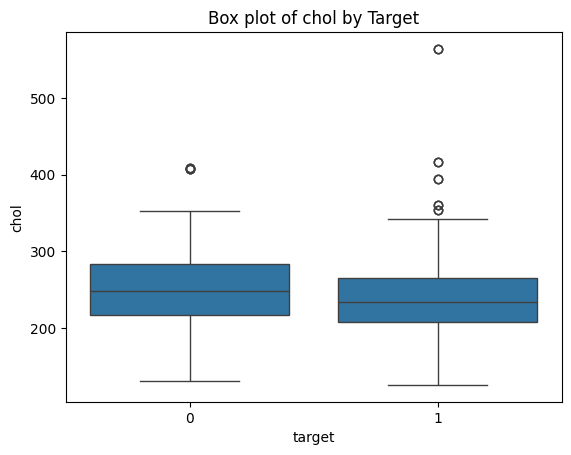

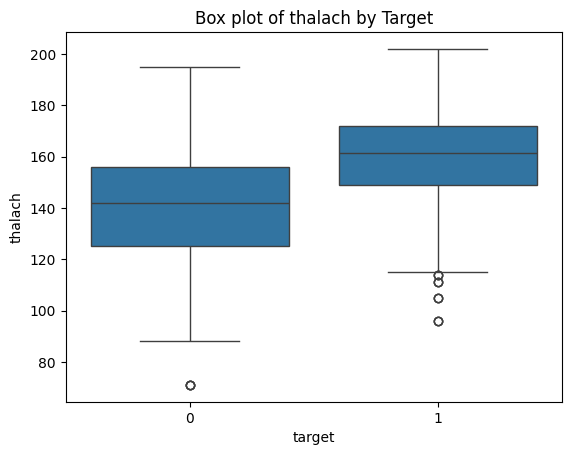

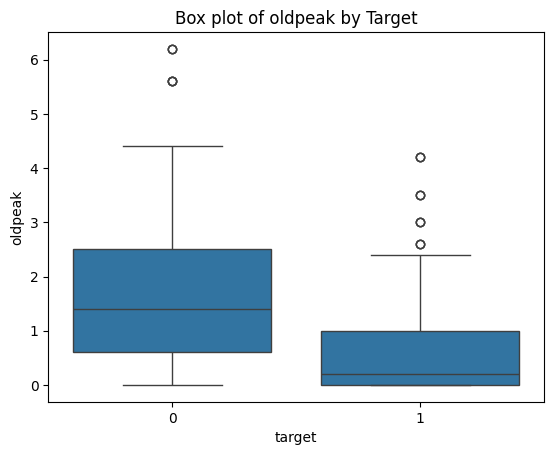

In [9]:
# Analyze feature distributions
print(data.describe())  # Display summary statistics for numerical features

# Plot histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_features:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_features:
    plt.figure()  # Create a new figure for each count plot
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Create box plots to visualize the distribution of numerical features by target class
for col in numerical_features:
  plt.figure()
  sns.boxplot(x="target", y=col, data=data)
  plt.title(f"Box plot of {col} by Target")
  plt.show()


In [18]:
y = data["target"]

target
1    526
0    499
Name: count, dtype: int64


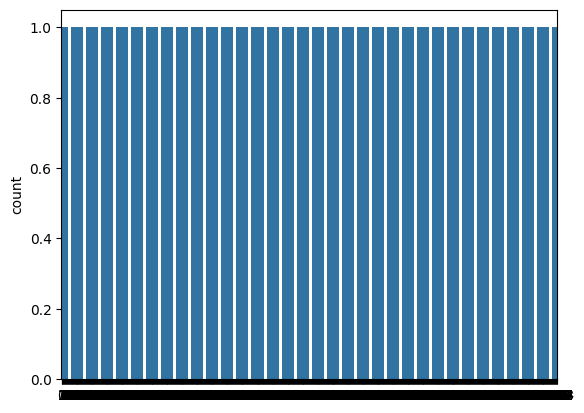

In [19]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

**Percentage of patient with or without heart problems in the given datase**

In [20]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


Here 0 is female and 1 is male patients

In [22]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


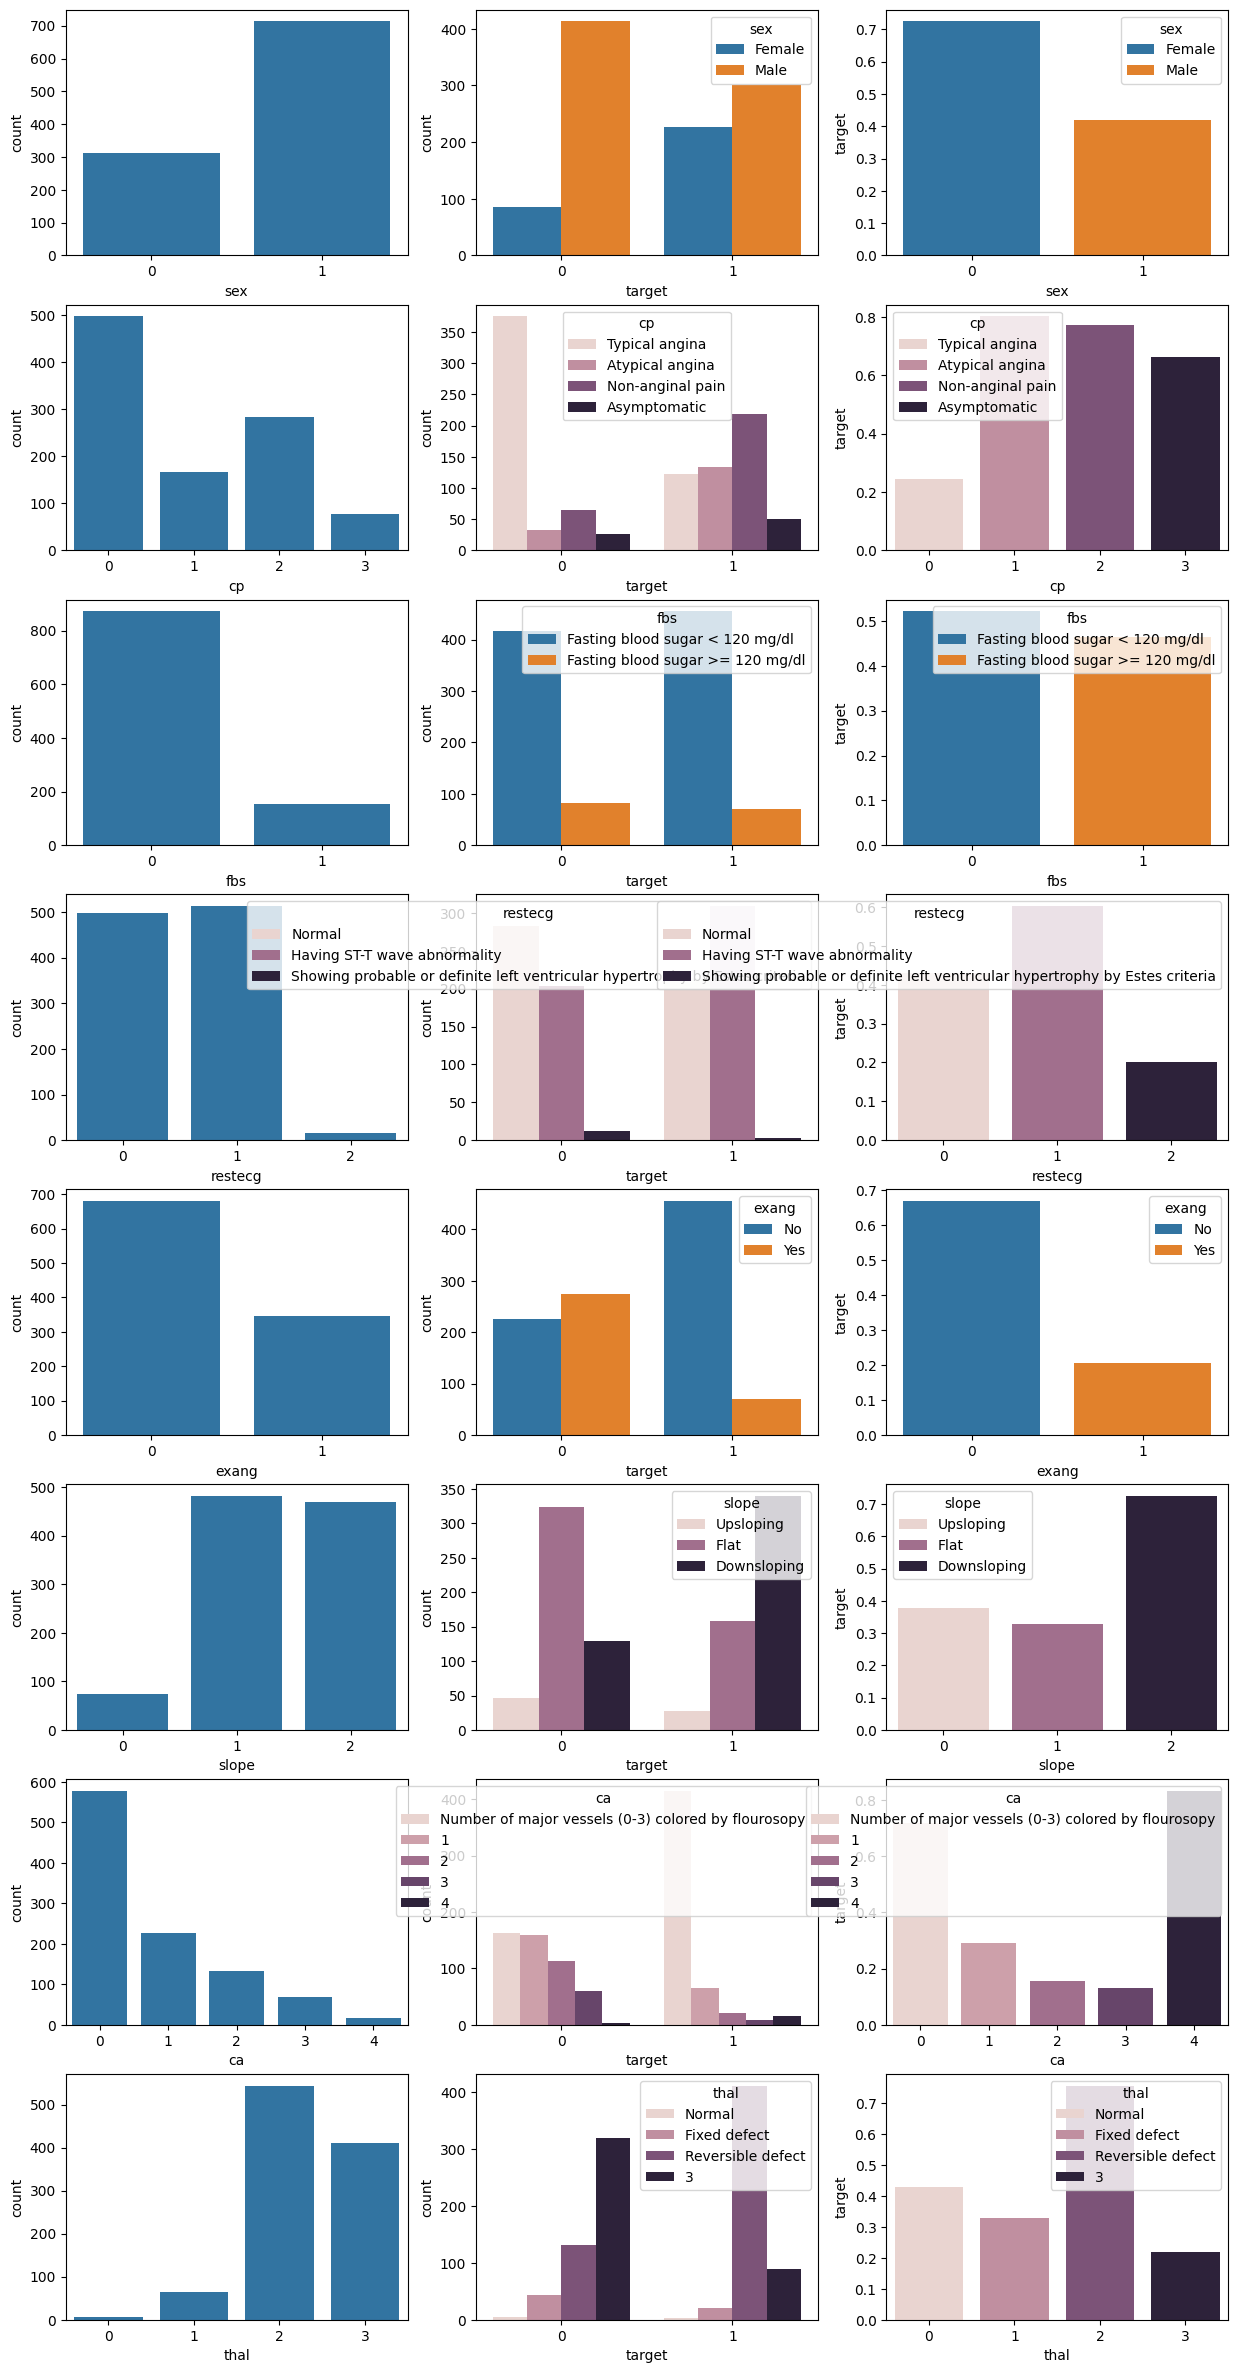

In [29]:
categorial = [
    ('sex', ['Female', 'Male']),
    ('cp', ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']),
    ('fbs', ['Fasting blood sugar < 120 mg/dl', 'Fasting blood sugar >= 120 mg/dl']),
    ('restecg', ['Normal', 'Having ST-T wave abnormality', 'Showing probable or definite left ventricular hypertrophy by Estes criteria']),
    ('exang', ['No', 'Yes']),
    ('slope', ['Upsloping', 'Flat', 'Downsloping']),
    ('ca', ['Number of major vessels (0-3) colored by flourosopy']),
    ('thal', ['Normal', 'Fixed defect', 'Reversible defect']),
]

fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

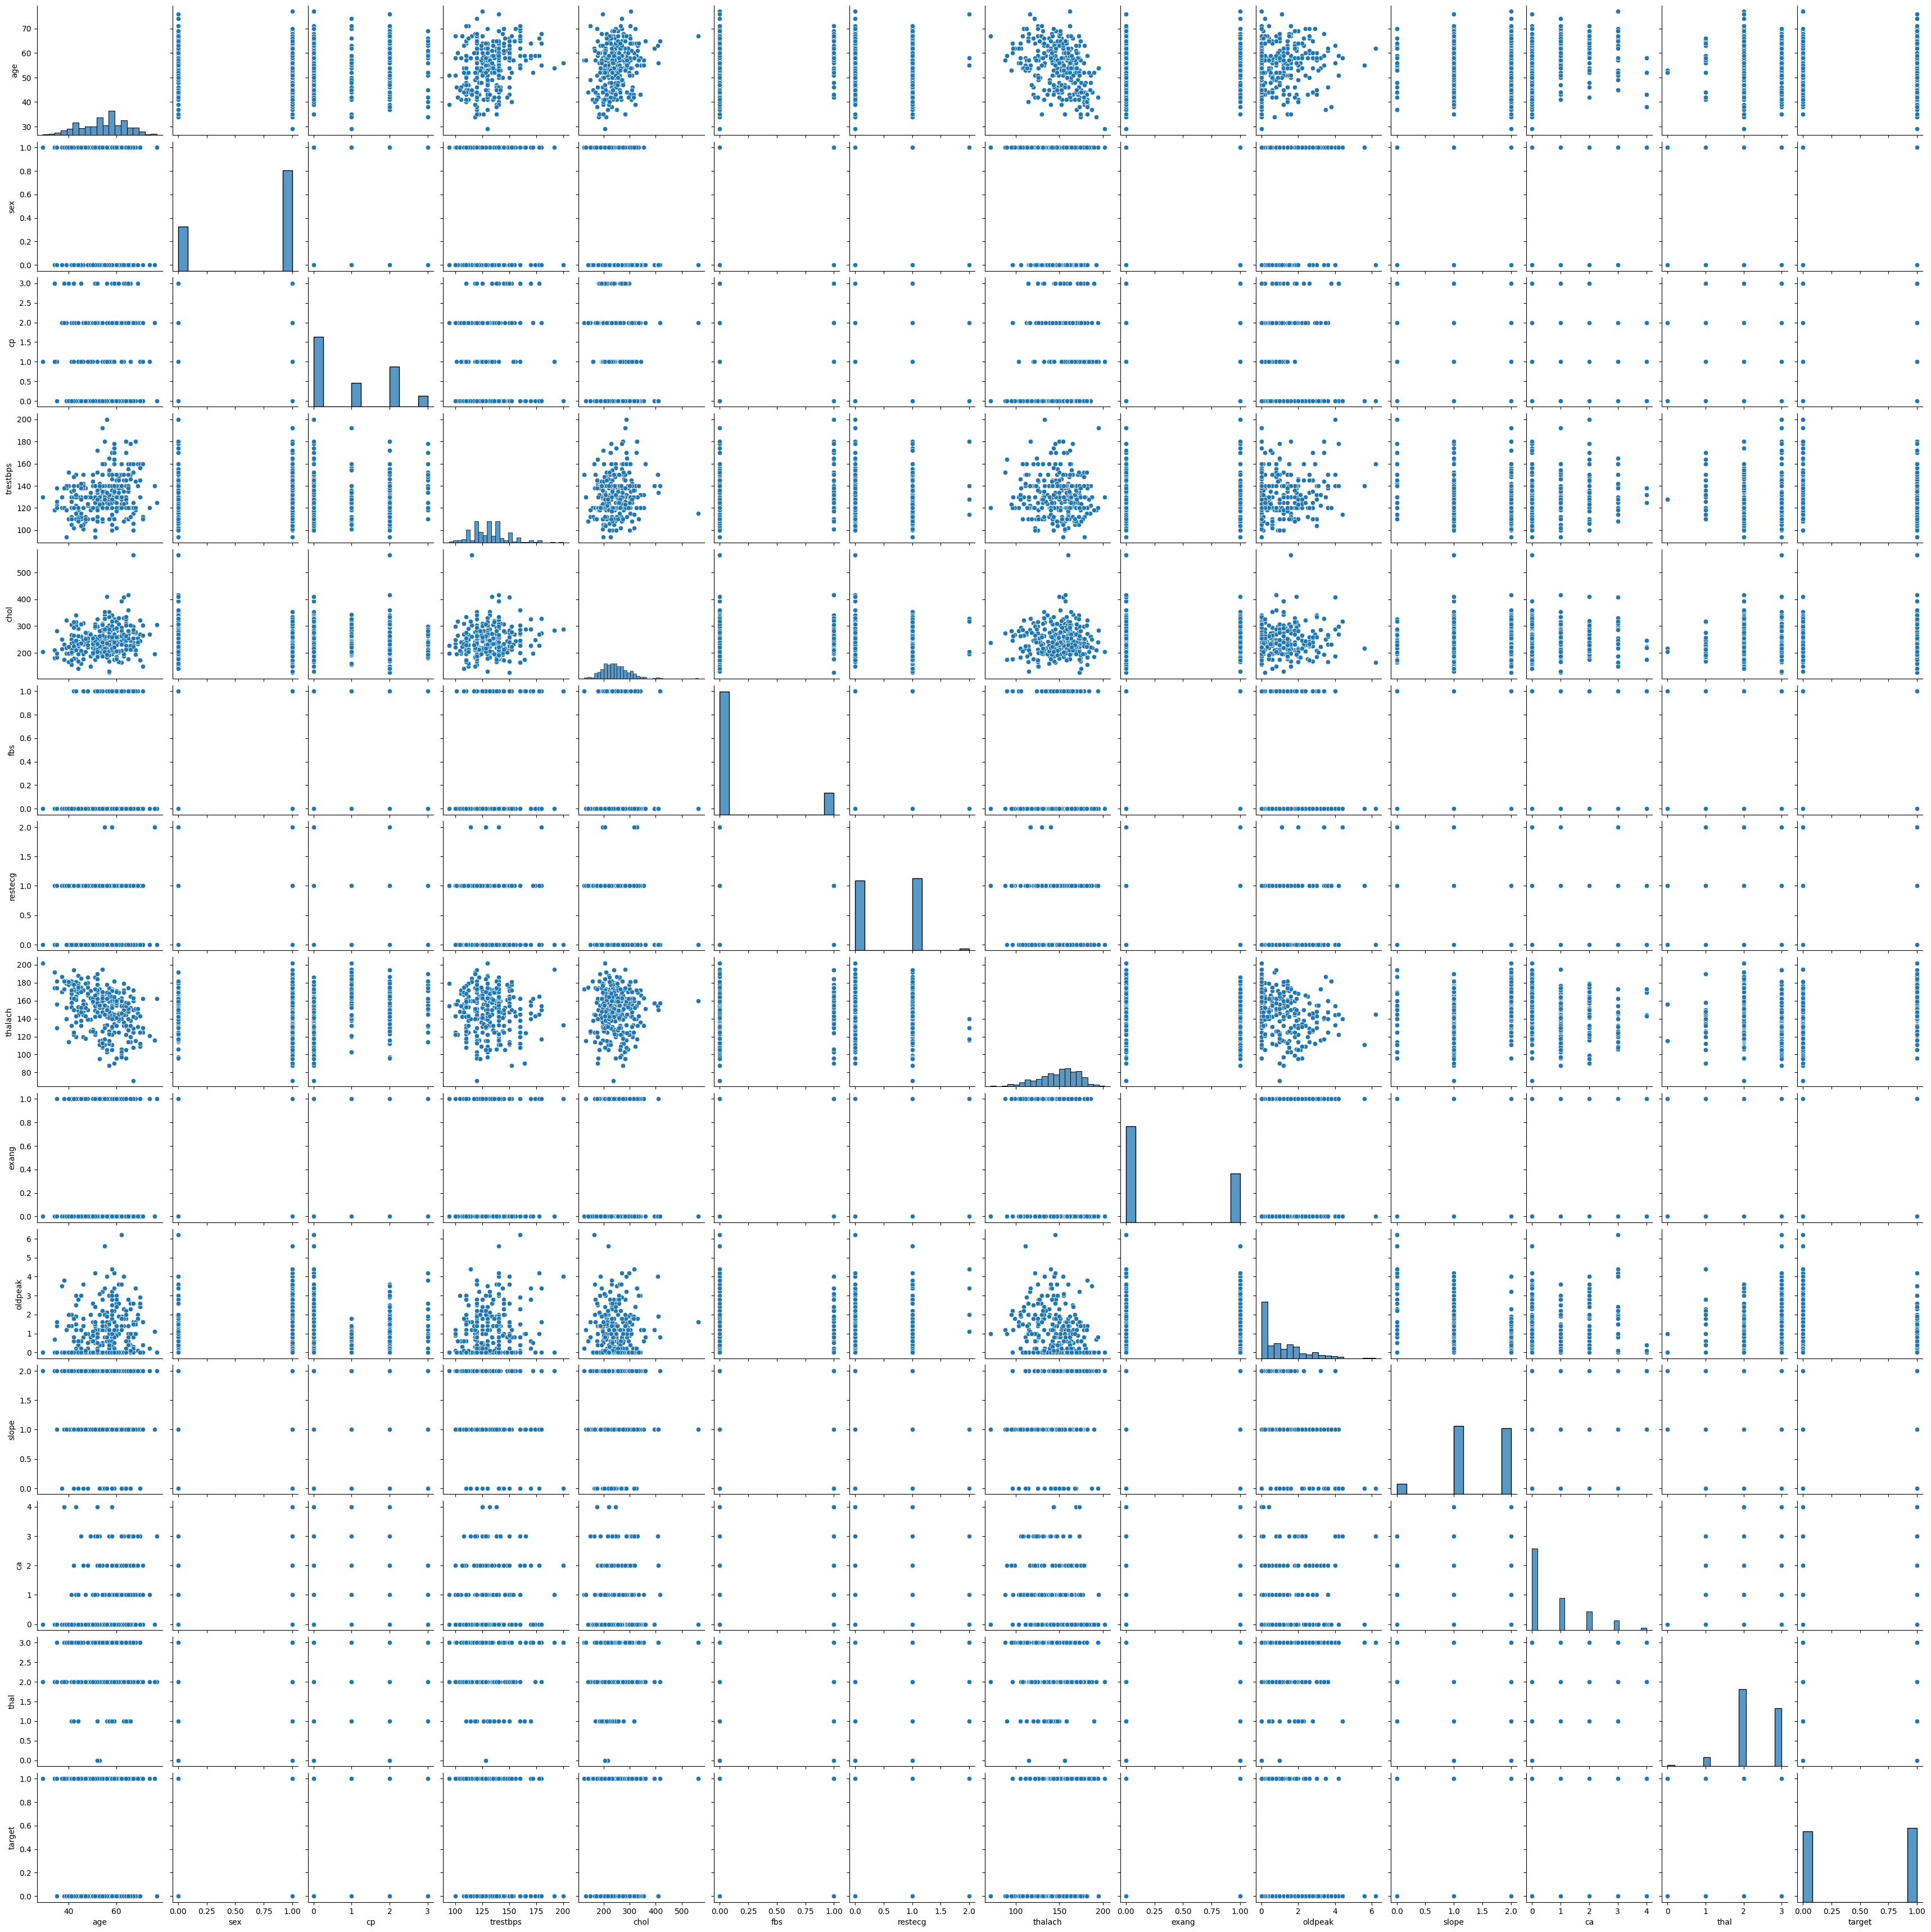

In [30]:
sns.pairplot(data=data)

**Splitting the dataset to Train and Test**

In [37]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [38]:
X_train.shape

(820, 13)

In [39]:
X_test.shape

(205, 13)

In [40]:
Y_train.shape

(820,)

In [41]:
Y_test.shape

(205,)

**Modelling and predicting with Machine Learning**

In [44]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

# **Logistic regression**

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


In [46]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [47]:
print(confusion_matrix(Y_test,y_pred_lr))
print(classification_report(Y_test,y_pred_lr))
print("Accuracy:",accuracy_score(Y_test, y_pred_lr))

[[ 77  21]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205

Accuracy: 0.8634146341463415


In [48]:
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 86.22%
Test accuracy: 86.34%


Best ACCURACY possible using Logistic regression

In [49]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg').fit(X_test, Y_test)
#The solver for weight optimization.
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, Y_test)

0.8926829268292683

**Confusion Matrix**

<Axes: >

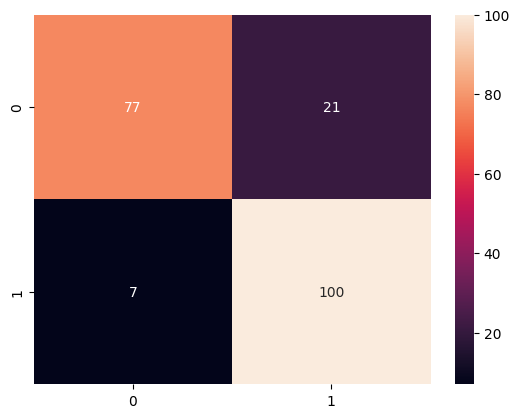

In [50]:
matrix= confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

**Precision Score**

In [51]:
precision = precision_score(Y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.8264462809917356


**Recall**

In [56]:
recall = recall_score(Y_test, y_pred_lr)
print("Recall is:",recall)

Recall is: 0.9345794392523364


**F1-Score**

In [57]:
print("F1-Score is:",(2*precision*recall)/(precision+recall))

F1-Score is: 0.8771929824561404


# **Random Forest**

In [58]:
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1]


**Learning curve for Training score & cross validation score**

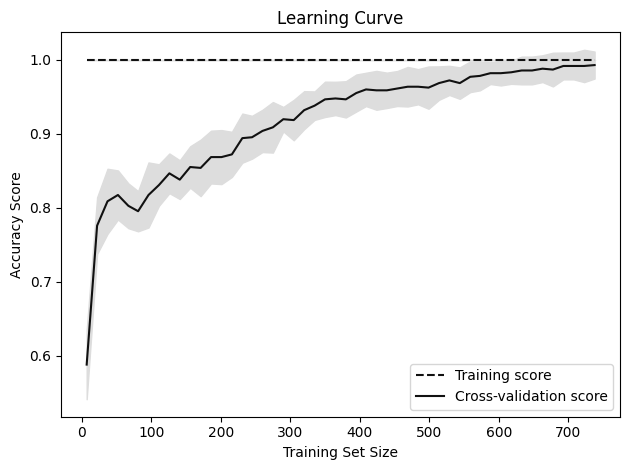

In [59]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train,
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [60]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [61]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Now, let us prune the depth of trees and check the accuracy.

In [62]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.902


**Confusion Matrix**

<Axes: >

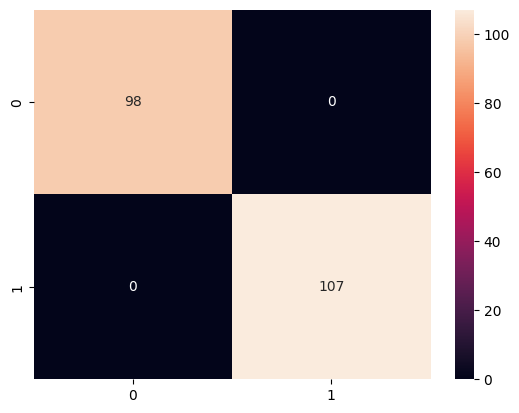

In [64]:
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

**Precision Score**

In [68]:
precision = precision_score(Y_test, y_pred_rf)
print("Precision:",precision)

Precision: 1.0


**Recall**

In [69]:
recall = recall_score(Y_test, y_pred_rf)
print("Recall is:",recall)

Recall is: 1.0


**F1-score**

In [70]:
print("F1-Score is:",(2*precision*recall)/(precision+recall))

F1-Score is: 1.0


# **SVM**

In [81]:
y = data["target"]
x = data.drop(["target"],axis = 1)

In [82]:
print("befor scaling the values of x is")
x

befor scaling the values of x is


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [83]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**SCALING OPERATION**

In [84]:
from sklearn.preprocessing import StandardScaler
scaled_values = StandardScaler()

In [85]:
scaled_values.fit(x)

StandardScaler()

In [86]:
x = scaled_values.transform(x)
print("after the scaling the values of x is")
x

after the scaling the values of x is


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [87]:
# splitting the data using 'train_test_split'
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 120)

In [88]:
# preparing the svm model
classifier =svm.SVC()
classifier.fit(x_train, y_train)

SVC()

**Calculating the accuracy of model on training**

In [89]:
traindata = classifier.predict(x_train)
train_accuracy = accuracy_score(y_train,traindata)
train_accuracy

0.9597560975609756

**Calculating the accuracy of model on testing**

In [90]:
y_predict =classifier.predict(x_test)  #predicting
# calculating the accuracy
accuracy = accuracy_score(y_test,y_predict)*100
print("the accuracy of the model is",accuracy)

the accuracy of the model is 95.60975609756098


**CLASSIFICATION REPORT**

In [91]:
# preparing the classification report for linear kernel
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        98
           1       0.95      0.97      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [92]:
# Confusion matrix
confusion_matrix(y_test,y_predict)

array([[ 92,   6],
       [  3, 104]])

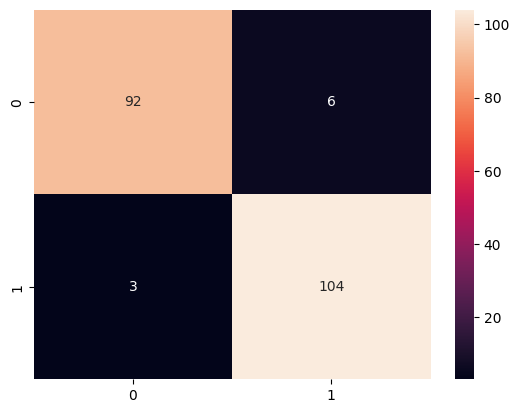

In [93]:
matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(matrix, annot=True, fmt="d")
plt.show()

# **Model Comparison**

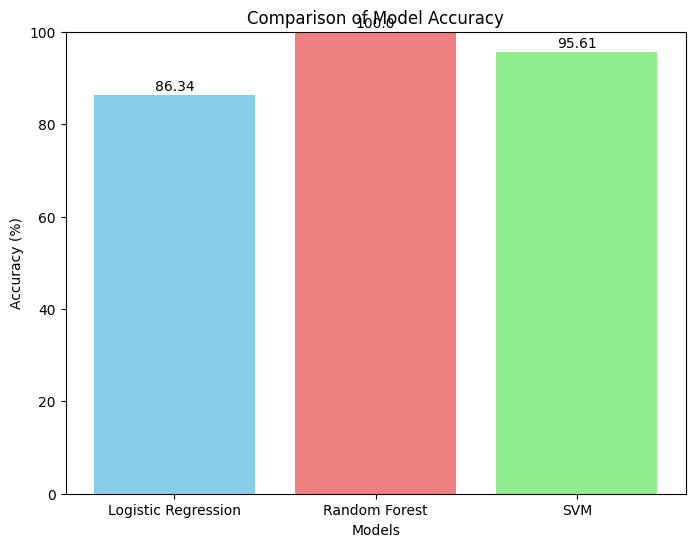

In [100]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [score_lr, score_rf, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracy")
plt.ylim(0, 100)
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 1, str(round(v, 2)), ha='center')  # Add accuracy values above bars
plt.show()

So Random Forest has best results between the three models.